<a href="https://colab.research.google.com/github/atharvaakulwar31/atharvaakulwar31/blob/main/MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(25)
np.random.seed(25)
tf.random.set_seed(25)

In [4]:

import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/ML/digit-recognizer/train.csv')
test = pd.read_csv('/content/drive/MyDrive/ML/digit-recognizer/test.csv')

In [5]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [9]:
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [35]:
train.shape

(42000, 785)

In [11]:
test.shape

(28000, 784)

In [37]:
#checking for null values for train
train.isnull().sum()

,0
label,0
pixel0,0
pixel1,0
pixel2,0
pixel3,0
...,...
pixel779,0
pixel780,0
pixel781,0
pixel782,0


In [39]:
test = pd.DataFrame(test.reshape(test.shape[0], -1))


In [40]:
#checking for null values for test
test.isnull().sum()


,0
0,0
1,0
2,0
3,0
4,0
...,...
779,0
780,0
781,0
782,0


In [41]:

#checking for duplicates
print(train.duplicated().sum())
print(test.duplicated().sum())

0
0


In [42]:
train.columns


Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [44]:
train['label'].value_counts()

,count
label,
1,4684
7,4401
3,4351
9,4188
2,4177
6,4137
0,4132
4,4072
8,4063


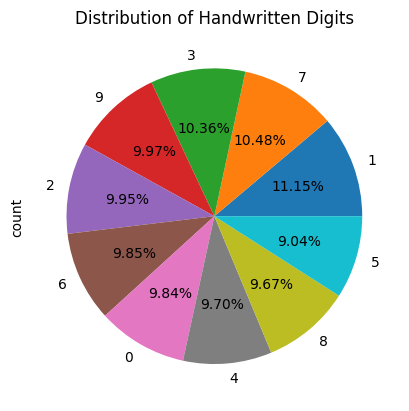

In [45]:
train['label'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.title('Distribution of Handwritten Digits')
plt.show()



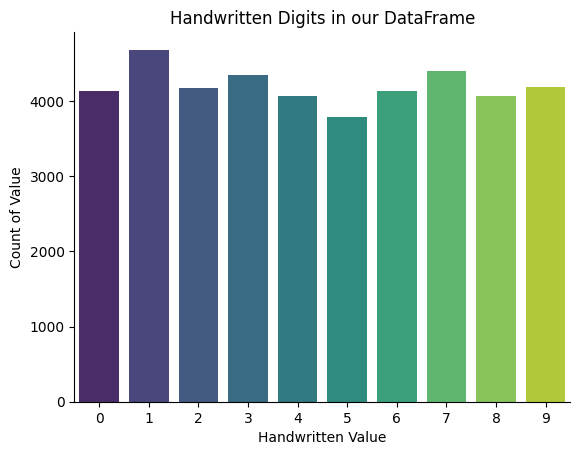

In [49]:

# Create a DataFrame for the labels
labels_df = pd.DataFrame(train, columns=['label'])

# Plot the distribution of digits
sns.countplot(data=labels_df, x='label', palette='viridis')
plt.xlabel("Handwritten Value")
plt.ylabel("Count of Value")
plt.title("Handwritten Digits in our DataFrame")
sns.despine()


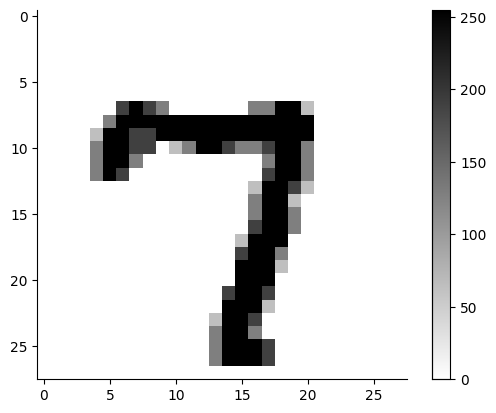

In [50]:

digit = train.iloc[29, 1:]
arr = np.array(digit)

image_arr = np.reshape(arr, (28,28))
dig_img = plt.imshow(image_arr, cmap=plt.cm.binary)
plt.colorbar(dig_img)
sns.despine()


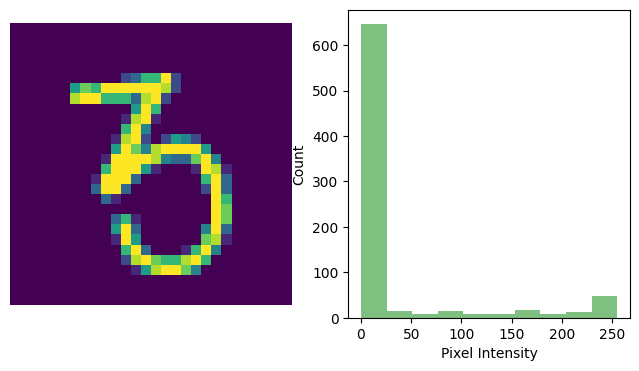

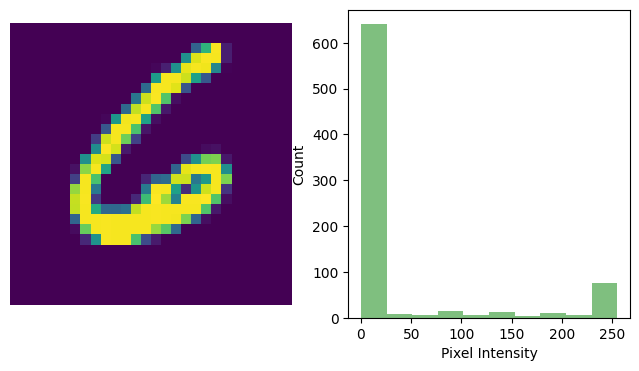

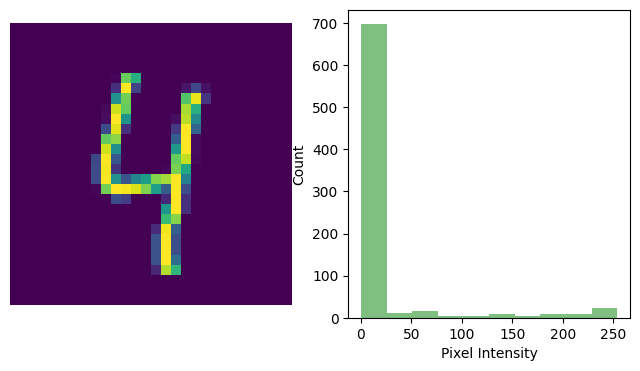

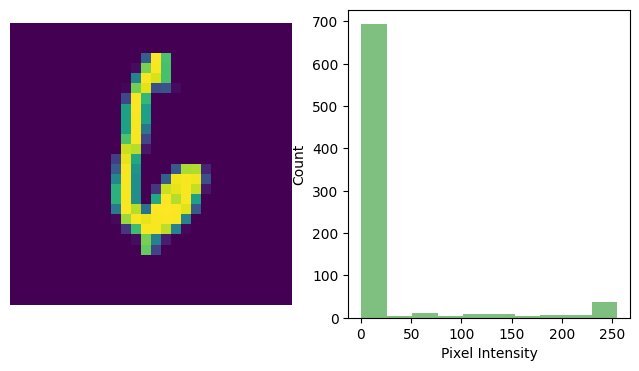

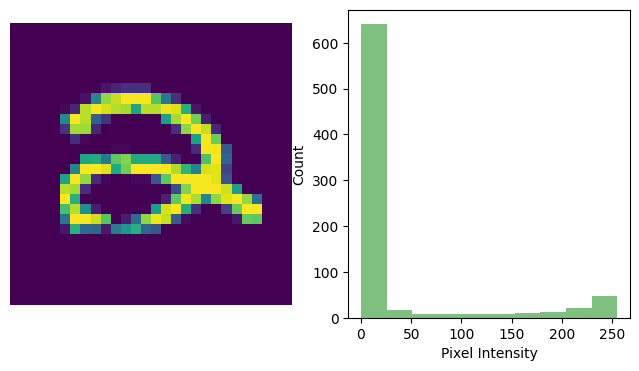

In [51]:


#displaying images and plotting pixel int
def plotHist(img):
  img = train.iloc[img, 1:].values.reshape(28,28)
  plt.figure(figsize=(8,4))
  plt.subplot(1,2,1)
  plt.imshow(img, cmap='viridis')
  plt.axis('off')
  histo = plt.subplot(1,2,2)
  histo.set_ylabel('Count')
  histo.set_xlabel('Pixel Intensity')
  plt.hist(img.flatten(), bins=10, lw=0, color='green', alpha=0.5)

for i in range(90,95):
  plotHist(i)

In [52]:
# Separate features and labels

X = train.iloc[:,1:]
y = train['label']


#converting to numpy arrays
X = X.values
y = y.values


In [53]:

# Normalize pixel values to range [0, 1]
X = X / 255
test_df = test/255.0

# Reshape into 4D tensor (number of samples, height, width, channels)
X = X.reshape(-1, 28, 28, 1)

In [54]:

#one hot encoding y
from keras.utils import to_categorical
y = y.ravel()
y = to_categorical(y, 10)

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))),
model.add(MaxPooling2D(pool_size=(2, 2))),

model.add(Conv2D(64, (3, 3), activation='relu')),
model.add(MaxPooling2D(pool_size=(2, 2))),

model.add(Flatten()),

model.add(Dense(128, activation='relu')),
model.add(Dropout(0.5)),
model.add(Dense(10, activation='softmax'))

In [57]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [58]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=15,
    batch_size=64,
    verbose=1
)


Epoch 1/15
525/525 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7905 - loss: 0.6478 - val_accuracy: 0.9758 - val_loss: 0.0788
Epoch 2/15
525/525 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9676 - loss: 0.1095 - val_accuracy: 0.9849 - val_loss: 0.0509
Epoch 3/15
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9766 - loss: 0.0788 - val_accuracy: 0.9864 - val_loss: 0.0426
Epoch 4/15
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9798 - loss: 0.0678 - val_accuracy: 0.9867 - val_loss: 0.0437
Epoch 5/15
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9843 - loss: 0.0498 - val_accuracy: 0.9856 - val_loss: 0.0432
Epoch 6/15
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9852 - loss: 0.0463 - val_accuracy: 0.9881 - val_loss: 0.0354
Epoch 7/15
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9887 - loss: 0.0354 - val_accuracy: 0.9894 - val_loss: 0.0359
Epoch 8/15
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9880 - loss: 0.0356 - val_accuracy: 0.

In [60]:
loss,accuracy = model.evaluate(X_train,y_train)
print(f"The model accuracy is : {accuracy} \nThe model loss : {loss}")

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9981 - loss: 0.0055
The model accuracy is : 0.9981547594070435 
The model loss : 0.005571212153881788


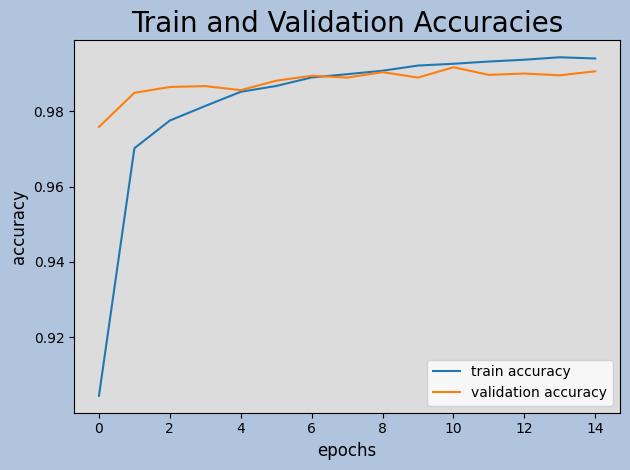

In [61]:
plt.plot(history.history['accuracy'],label='train accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('epochs',fontsize=12)
plt.ylabel('accuracy',fontsize=12)
plt.legend()

plt.title('Train and Validation Accuracies',fontsize=20)

plt.tight_layout()
plt.gca().set_facecolor('gainsboro')
plt.gcf().patch.set_facecolor('lightsteelblue')

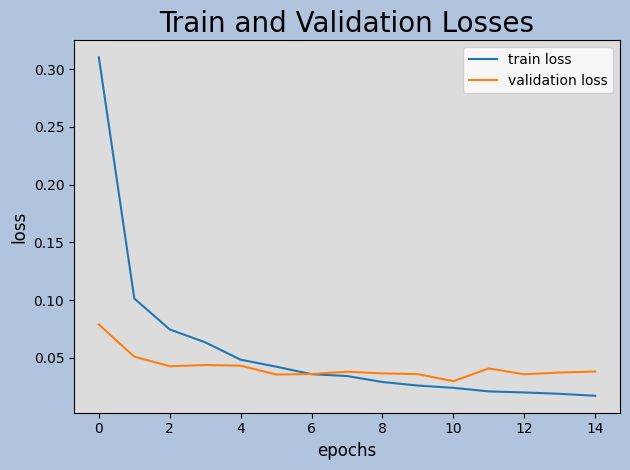

In [62]:

plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('epochs',fontsize=12)
plt.ylabel('loss',fontsize=12)
plt.legend()

plt.title('Train and Validation Losses',fontsize=20)

plt.tight_layout()
plt.gca().set_facecolor('gainsboro')
plt.gcf().patch.set_facecolor('lightsteelblue')

In [63]:
# Predict the class probabilities for the test dataset
predictions = model.predict(X_val)

# Convert probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_val, axis=1)  # Convert one-hot to class indices


263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [64]:

from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
true_labels = np.argmax(y_val, axis=1)  # Convert one-hot encoded to class indices
predicted_labels = np.argmax(predictions, axis=1)  # Already converting probabilities to class indices
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

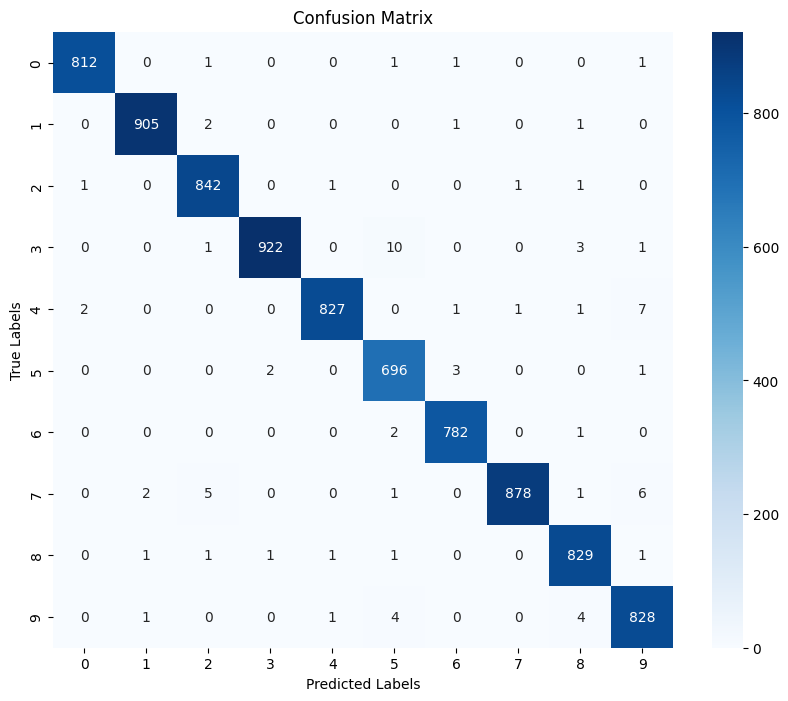

In [65]:
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [66]:
# Save the model
model.save("MNIST_Classification.keras")

In [67]:

# Save weights
model.save_weights('model.weights.h5')

In [68]:
# Convert Test data to NumPy array
test_X = test_df.to_numpy()

# Reshape X to 4D for CNN
test_X = test_X.reshape(-1, 28, 28, 1)  # reshaping 28x28 grayscale images

In [69]:
test_X.shape

(28000, 28, 28, 1)

In [70]:
# Predict the labels for the test data
predictions = model.predict(test_X)

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [71]:
predicted_labels = np.argmax(predictions, axis=1)


In [72]:
print(predicted_labels)

[1 1 1 ... 1 1 1]


In [73]:

predicted_labels.shape

(28000,)

In [74]:

submission =  pd.DataFrame({
        "ImageId": test_df.index+1,
        "Label":predicted_labels
    })

In [75]:
submission['Label'].value_counts()

,count
Label,
1,28000


In [76]:

submission.to_csv('MNIST_submission.csv', index=False)
